In [1]:
import pandas as pd
import numpy as np

### By using `read_csv(engine, encoding)`, solving the utf-8 error, and reading the file correctly. 
reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [2]:
air_2017 = pd.read_csv('Beijing_2017_HourlyPM25_created20170803.csv', skiprows=3, engine ='python', encoding = 'latin_1', parse_dates=[2])
air_2017.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,2017-01-01 00:00:00,2017,1,1,0,505,µg/m³,1 Hr,Valid
1,Beijing,PM2.5,2017-01-01 01:00:00,2017,1,1,1,485,µg/m³,1 Hr,Valid
2,Beijing,PM2.5,2017-01-01 02:00:00,2017,1,1,2,466,µg/m³,1 Hr,Valid
3,Beijing,PM2.5,2017-01-01 03:00:00,2017,1,1,3,435,µg/m³,1 Hr,Valid
4,Beijing,PM2.5,2017-01-01 04:00:00,2017,1,1,4,405,µg/m³,1 Hr,Valid


In [3]:
air_2017.tail()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
4339,Beijing,PM2.5,2017-06-30 19:00:00,2017,6,30,19,51,µg/m³,1 Hr,Valid
4340,Beijing,PM2.5,2017-06-30 20:00:00,2017,6,30,20,68,µg/m³,1 Hr,Valid
4341,Beijing,PM2.5,2017-06-30 21:00:00,2017,6,30,21,61,µg/m³,1 Hr,Valid
4342,Beijing,PM2.5,2017-06-30 22:00:00,2017,6,30,22,49,µg/m³,1 Hr,Valid
4343,Beijing,PM2.5,2017-06-30 23:00:00,2017,6,30,23,55,µg/m³,1 Hr,Valid


In [4]:
air_2017.index

RangeIndex(start=0, stop=4344, step=1)

In [5]:
air_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Site        4344 non-null   object        
 1   Parameter   4344 non-null   object        
 2   Date (LST)  4344 non-null   datetime64[ns]
 3   Year        4344 non-null   int64         
 4   Month       4344 non-null   int64         
 5   Day         4344 non-null   int64         
 6   Hour        4344 non-null   int64         
 7   Value       4344 non-null   int64         
 8   Unit        4344 non-null   object        
 9   Duration    4344 non-null   object        
 10  QC Name     4344 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 373.4+ KB


In [6]:
air_2017.columns

Index(['Site', 'Parameter', 'Date (LST)', 'Year', 'Month', 'Day', 'Hour',
       'Value', 'Unit', 'Duration', 'QC Name'],
      dtype='object')

### Looking for the missing data. According to *the U.S. Department of State air quality files*, Missing values are listed as -999 but not null. In this case, we can't filter boolean by using 'dropna( )'.

In [37]:
air_2017_filtered = air_2017[air_2017['Value'] == -999]
air_2017_filtered

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name


### Data cleaning. By using `drop( )`, removing the rows with missing data.

In [38]:
air_2017 = air_2017.drop(air_2017.loc[air_2017['Value'] == -999].index)
air_2017

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,2017-01-01 00:00:00,2017,1,1,0,505,µg/m³,1 Hr,Valid
1,Beijing,PM2.5,2017-01-01 01:00:00,2017,1,1,1,485,µg/m³,1 Hr,Valid
2,Beijing,PM2.5,2017-01-01 02:00:00,2017,1,1,2,466,µg/m³,1 Hr,Valid
3,Beijing,PM2.5,2017-01-01 03:00:00,2017,1,1,3,435,µg/m³,1 Hr,Valid
4,Beijing,PM2.5,2017-01-01 04:00:00,2017,1,1,4,405,µg/m³,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...
4339,Beijing,PM2.5,2017-06-30 19:00:00,2017,6,30,19,51,µg/m³,1 Hr,Valid
4340,Beijing,PM2.5,2017-06-30 20:00:00,2017,6,30,20,68,µg/m³,1 Hr,Valid
4341,Beijing,PM2.5,2017-06-30 21:00:00,2017,6,30,21,61,µg/m³,1 Hr,Valid
4342,Beijing,PM2.5,2017-06-30 22:00:00,2017,6,30,22,49,µg/m³,1 Hr,Valid


In [39]:
air_2017.Value.max()

684

In [40]:
air_2017.Value.mean()

70.07738646895274

In [41]:
air_2017.Value.median()

43.0

### To get the first sense of how air quality looks like in Beijing, 2015, from 00:00 Jan 1st to 23:59 Dec 31.

<AxesSubplot:>

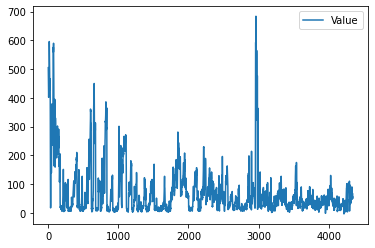

In [13]:
air_2017.plot(y='Value')

In [14]:
midnight=air_2017[air_2017['Hour'] == 0]

In [150]:
midnight

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,2015-01-01,2015,1,1,0,22,µg/m³,1 Hr,Valid
24,Beijing,PM2.5,2015-01-02,2015,1,2,0,126,µg/m³,1 Hr,Valid
48,Beijing,PM2.5,2015-01-03,2015,1,3,0,163,µg/m³,1 Hr,Valid
72,Beijing,PM2.5,2015-01-04,2015,1,4,0,272,µg/m³,1 Hr,Valid
96,Beijing,PM2.5,2015-01-05,2015,1,5,0,171,µg/m³,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...
8640,Beijing,PM2.5,2015-12-27,2015,12,27,0,32,µg/m³,1 Hr,Valid
8664,Beijing,PM2.5,2015-12-28,2015,12,28,0,120,µg/m³,1 Hr,Valid
8688,Beijing,PM2.5,2015-12-29,2015,12,29,0,294,µg/m³,1 Hr,Valid
8712,Beijing,PM2.5,2015-12-30,2015,12,30,0,536,µg/m³,1 Hr,Valid


In [15]:
midday = air_2017[air_2017['Hour'] == 12]
midday

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
12,Beijing,PM2.5,2017-01-01 12:00:00,2017,1,1,12,474,µg/m³,1 Hr,Valid
36,Beijing,PM2.5,2017-01-02 12:00:00,2017,1,2,12,193,µg/m³,1 Hr,Valid
60,Beijing,PM2.5,2017-01-03 12:00:00,2017,1,3,12,238,µg/m³,1 Hr,Valid
84,Beijing,PM2.5,2017-01-04 12:00:00,2017,1,4,12,251,µg/m³,1 Hr,Valid
108,Beijing,PM2.5,2017-01-05 12:00:00,2017,1,5,12,261,µg/m³,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...
4236,Beijing,PM2.5,2017-06-26 12:00:00,2017,6,26,12,42,µg/m³,1 Hr,Valid
4260,Beijing,PM2.5,2017-06-27 12:00:00,2017,6,27,12,86,µg/m³,1 Hr,Valid
4284,Beijing,PM2.5,2017-06-28 12:00:00,2017,6,28,12,104,µg/m³,1 Hr,Valid
4308,Beijing,PM2.5,2017-06-29 12:00:00,2017,6,29,12,52,µg/m³,1 Hr,Valid


### I have a hypothesis, due to the actitivities during the daytime, air quality in the day is  worse than it in the night.

<AxesSubplot:>

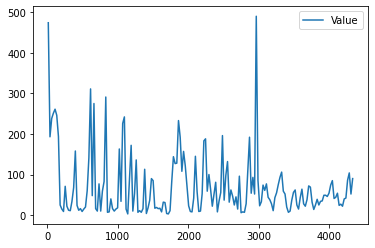

In [16]:
midday.plot(y='Value')

<AxesSubplot:>

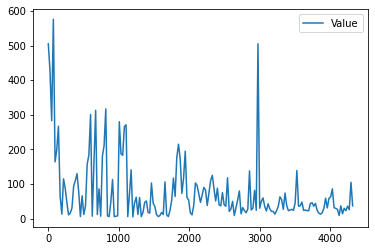

In [17]:
midnight.plot(y='Value')

Text(0, 0.5, 'PM 2.5')

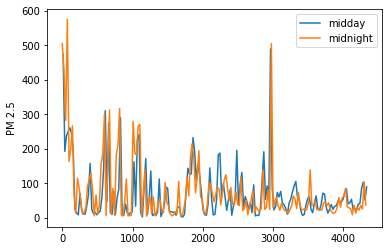

In [18]:
ax = midday.plot(y="Value", label="midday")
midnight.plot(y="Value",label="midnight",ax=ax)
ax.set_ylabel("PM 2.5")

### I assume the air quality on Chinese new year eve is more likely worse than new year eve, due to the cultural bond.

In [20]:
new_year_eve = air_2017[((air_2017['Month']==12) & (air_2017['Day']==31))]
new_year_eve

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name


In [21]:
new_year_eve.describe()

,Year,Month,Day,Hour,Value
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Hour'>

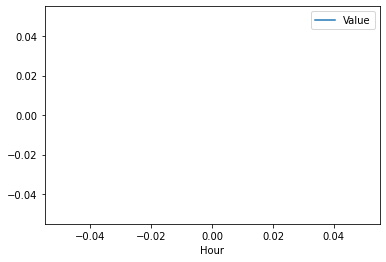

In [22]:
new_year_eve.plot(x='Hour', y='Value')

Chinese new year is Feb 19

In [24]:
chinese_new_year_eve = air_2017[((air_2017['Month']==1) & (air_2017['Day']==27))]
chinese_new_year_eve.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
624,Beijing,PM2.5,2017-01-27 00:00:00,2017,1,27,0,7,µg/m³,1 Hr,Valid
625,Beijing,PM2.5,2017-01-27 01:00:00,2017,1,27,1,10,µg/m³,1 Hr,Valid
626,Beijing,PM2.5,2017-01-27 02:00:00,2017,1,27,2,12,µg/m³,1 Hr,Valid
627,Beijing,PM2.5,2017-01-27 03:00:00,2017,1,27,3,8,µg/m³,1 Hr,Valid
628,Beijing,PM2.5,2017-01-27 04:00:00,2017,1,27,4,6,µg/m³,1 Hr,Valid


In [25]:
chinese_new_year_eve.describe()

,Year,Month,Day,Hour,Value
count,24.0,24.0,24.0,24.000000,24.000000
mean,2017.0,1.0,27.0,11.500000,64.291667
std,0.0,0.0,0.0,7.071068,87.082409
min,2017.0,1.0,27.0,0.000000,5.000000
25%,2017.0,1.0,27.0,5.750000,11.500000
50%,2017.0,1.0,27.0,11.500000,35.000000
75%,2017.0,1.0,27.0,17.250000,67.750000
max,2017.0,1.0,27.0,23.000000,359.000000


<AxesSubplot:xlabel='Hour'>

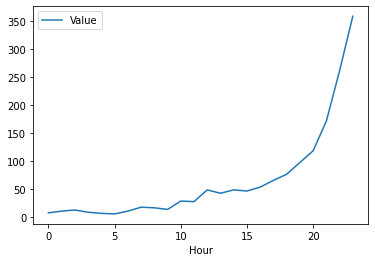

In [26]:
chinese_new_year_eve.plot(x ='Hour', y='Value')

Text(0, 0.5, 'PM 2.5')

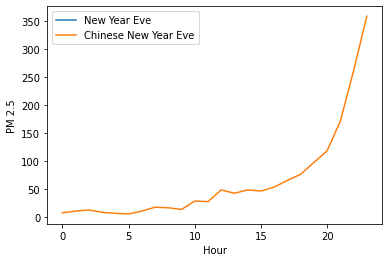

In [27]:
ax = new_year_eve.plot(x="Hour", y="Value", label="New Year Eve")
chinese_new_year_eve.plot(x="Hour",y="Value",label="Chinese New Year Eve",ax=ax)
ax.set_ylabel("PM 2.5")

*Next step:* Compare the two different new year's eves with an average day (calculated hour by hour).

### To compare to normal days, I need to find the average index of every hour.

In [29]:
hourly_average = air_2017[['Hour','Value']].groupby(['Hour']).mean().reset_index()
hourly_average

,Hour,Value
0,0,75.759777
1,1,75.089385
2,2,76.117318
3,3,73.922652
4,4,74.950000
5,5,74.433333
6,6,73.955556
7,7,77.178771
8,8,73.755556
9,9,70.966480


Text(0, 0.5, 'PM 2.5')

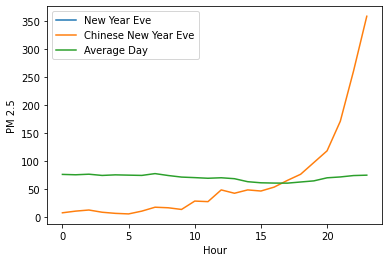

In [30]:
ax = new_year_eve.plot(x="Hour", y="Value", label="New Year Eve")
chinese_new_year_eve.plot(x="Hour",y="Value",label="Chinese New Year Eve",ax=ax)
hourly_average.plot(x='Hour',y='Value',label="Average Day", ax=ax)
ax.set_ylabel("PM 2.5")

### I also want to know in which month/months, Beijingers have better air.

In [31]:
month_average = air_2017[['Month','Value']].groupby(['Month']).mean().reset_index()
month_average

,Month,Value
0,1,123.822888
1,2,76.159701
2,3,63.673854
3,4,55.723703
4,5,60.469003
5,6,40.134266


In [32]:
list(month_average['Month'])

[1, 2, 3, 4, 5, 6]

In [33]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

<BarContainer object of 6 artists>

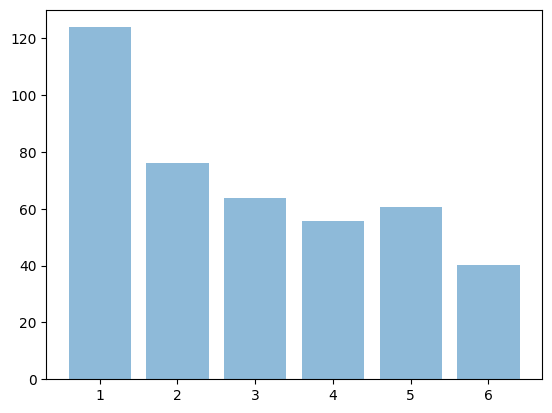

In [34]:
plt.bar(list(month_average['Month']), list(month_average['Value']), align='center',alpha=0.5)

In [35]:
from datetime import date
month_names = [date(2017,m,1).strftime('%b') for m in list(month_average['Month'])]
month_names

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

<BarContainer object of 6 artists>

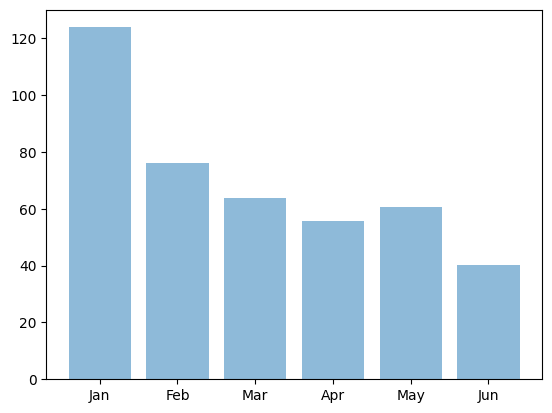

In [36]:
plt.bar(month_names, list(month_average['Value']), align='center',alpha=0.5)